In [2]:

import numpy as np
import torch
import math
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import GPyOpt
#import GPy
import random
import os
import matplotlib as mpl
import matplotlib.tri as tri
#import ternary
import pickle
import datetime
from collections import Counter
import matplotlib.ticker as ticker
#import pyDOE
import random
from scipy.stats import norm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import decomposition
import plotly
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.font_manager as font_manager
import copy

In [3]:
dataset_name = 'Pool'
raw_dataset = pd.read_csv("../saved_data/simulation_log_from_gsheet_new.csv")
feature_name = list(raw_dataset.columns)[:5]
objective_name = list(raw_dataset.columns)[5]

In [4]:
feature_name

['yb_1', 'er_1', 'yb_2', 'er_2', 'radius']

In [5]:
objective_name

'UV'

In [6]:
ds = copy.deepcopy(raw_dataset) 
# only P3HT/CNT, Crossed barrel, AutoAM need this line; Perovskite and AgNP do not need this line.
ds[objective_name] = raw_dataset[objective_name].values


In [7]:
ds_grouped = ds.groupby(feature_name)[objective_name].agg(lambda x: x.unique().mean())
ds_grouped = (ds_grouped.to_frame()).reset_index()
ds_grouped


,yb_1,er_1,yb_2,er_2,radius,UV
0,0.000000,0.000000,0.000605,0.022689,25.868183,0.000000
1,0.000000,0.000000,0.003761,0.448441,16.147160,0.000000
2,0.000000,0.000000,0.006742,0.739069,32.400196,0.000000
3,0.000000,0.000000,0.008852,0.007684,27.069950,0.000000
4,0.000000,0.000000,0.010719,0.051846,17.191846,0.000000
...,...,...,...,...,...,...
667,0.808762,0.027272,0.208812,0.126850,11.323654,218.749711
668,0.819924,0.025274,0.003244,0.048658,13.832287,1631.249543
669,0.822783,0.130416,0.087635,0.496305,27.715897,112.499948
670,0.823876,0.110897,0.034571,0.093575,28.492940,849.999818


In [8]:
s_scaler = preprocessing.StandardScaler()
ds_normalized_values = s_scaler.fit_transform(ds_grouped[feature_name].values)
ds_normalized_feature = pd.DataFrame(ds_normalized_values, columns = list(ds_grouped[feature_name].columns))
ds_normalized_feature

,yb_1,er_1,yb_2,er_2,radius
0,-1.100917,-0.981461,-0.991216,-0.851145,0.704622
1,-1.100917,-0.981461,-0.976628,1.051173,-0.414115
2,-1.100917,-0.981461,-0.962850,2.349739,1.456354
3,-1.100917,-0.981461,-0.953097,-0.918190,0.842926
4,-1.100917,-0.981461,-0.944468,-0.720868,-0.293889
...,...,...,...,...,...
667,2.301857,-0.851354,-0.028860,-0.385740,-0.969225
668,2.348819,-0.860886,-0.979018,-0.735112,-0.680521
669,2.360848,-0.359283,-0.588953,1.265036,0.917264
670,2.365447,-0.452403,-0.834221,-0.534417,1.006690


In [9]:
ds_normalized = pd.concat([ds_normalized_feature, ds_grouped['UV']], axis=1)
ds_normalized                           

,yb_1,er_1,yb_2,er_2,radius,UV
0,-1.100917,-0.981461,-0.991216,-0.851145,0.704622,0.000000
1,-1.100917,-0.981461,-0.976628,1.051173,-0.414115,0.000000
2,-1.100917,-0.981461,-0.962850,2.349739,1.456354,0.000000
3,-1.100917,-0.981461,-0.953097,-0.918190,0.842926,0.000000
4,-1.100917,-0.981461,-0.944468,-0.720868,-0.293889,0.000000
...,...,...,...,...,...,...
667,2.301857,-0.851354,-0.028860,-0.385740,-0.969225,218.749711
668,2.348819,-0.860886,-0.979018,-0.735112,-0.680521,1631.249543
669,2.360848,-0.359283,-0.588953,1.265036,0.917264,112.499948
670,2.365447,-0.452403,-0.834221,-0.534417,1.006690,849.999818


In [11]:
# since the five datasets have different dimensions, we want to visualize their manifold in a consistent manner
# here we want to visualize the pool of candidates in their respective 3D principal component space
rs =0
pca_ = decomposition.PCA(n_components=3, random_state = rs)
pca_.fit(ds_normalized[feature_name])
X_pca_values = pca_.transform(ds_normalized[feature_name])

In [43]:
X_pca = pd.DataFrame()
X_pca['PC1'] = X_pca_values[:,0] 
X_pca['PC2'] = X_pca_values[:,1] 
X_pca['PC3'] = X_pca_values[:,2] 
X_pca[objective_name] = ds_normalized[objective_name]
X_pca

,PC1,PC2,PC3,UV
0,-0.800054,-0.209123,0.158625,0.000000
1,0.398112,-0.301833,1.771680,0.000000
2,0.198021,-1.936517,1.988893,0.000000
3,-0.863363,-0.246950,0.052326,0.000000
4,-0.340769,0.356371,0.558532,0.000000
...,...,...,...,...
667,-1.464822,1.468352,0.510334,218.749711
668,-2.169839,1.006623,0.591269,1631.249543
669,-1.626518,-0.819631,0.933697,112.499948
670,-2.527237,-0.214247,-0.120478,849.999818


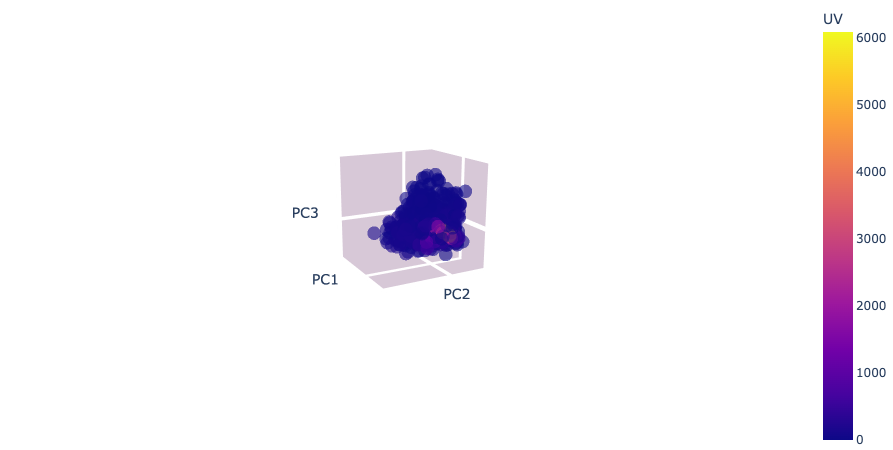

In [40]:
fig = px.scatter_3d(X_pca, x='PC1', y='PC2', z='PC3',
              color= objective_name, size_max = 20, opacity = 0.6)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.update_layout(
    autosize = False,
    scene = dict(
        xaxis = dict(autorange=False, 
                     nticks=3, 
                     range=[-2.5,4],
                     backgroundcolor="rgb(215, 200,215)",
                     gridcolor="white",
                     gridwidth = 2,
                     linecolor = "rgb(255, 255, 255)",
                     linewidth = 10,
                     showbackground=True,
                     zerolinecolor="rgb(255, 255, 255)",
                     zeroline = True,
                     zerolinewidth = 10,
                     showgrid = True,
                     visible = True,
                     showticklabels = False),
        yaxis = dict(autorange=False, 
                     nticks=3, 
                     range=[-2.4,5],
                     backgroundcolor="rgb(215, 200,215)",
                     gridcolor="white",
                     gridwidth = 2,
                     linecolor = "rgb(255, 255, 255)",
                     linewidth = 10,
                     showbackground=True,
                     zerolinecolor="rgb(255, 255, 255)",
                     zeroline = True,
                     zerolinewidth = 10,
                     showgrid = True,
                     visible = True,
                      showticklabels = False),
        zaxis = dict(autorange=False, 
                     nticks=3, 
                     range=[-3,4.5],
                     backgroundcolor="rgb(215, 200,215)",
                     gridcolor="white",
                     gridwidth = 2,
                     linecolor = "rgb(255, 255, 255)",
                     linewidth = 10,
                     showbackground=True,
                     zerolinecolor="rgb(255, 255, 255)",
                     zeroline = True,
                     zerolinewidth = 10,
                     showgrid = True,
                     visible = True,
                     showticklabels = False)
                ),
    
    scene_camera = dict(
        up=dict(x=0, y=0, z=1),
        center=dict(x=0, y=0, z=0),
        eye=dict(x=-1.2, y=1.56, z=1.92))
)





In [44]:
X_pca_log = copy.deepcopy(X_pca)
X_pca_log['UV'] = np.log(X_pca['UV']+1)
X_pca_log

,PC1,PC2,PC3,UV
0,-0.800054,-0.209123,0.158625,0.000000
1,0.398112,-0.301833,1.771680,0.000000
2,0.198021,-1.936517,1.988893,0.000000
3,-0.863363,-0.246950,0.052326,0.000000
4,-0.340769,0.356371,0.558532,0.000000
...,...,...,...,...
667,-1.464822,1.468352,0.510334,5.392489
668,-2.169839,1.006623,0.591269,7.397714
669,-1.626518,-0.819631,0.933697,4.731802
670,-2.527237,-0.214247,-0.120478,6.746412


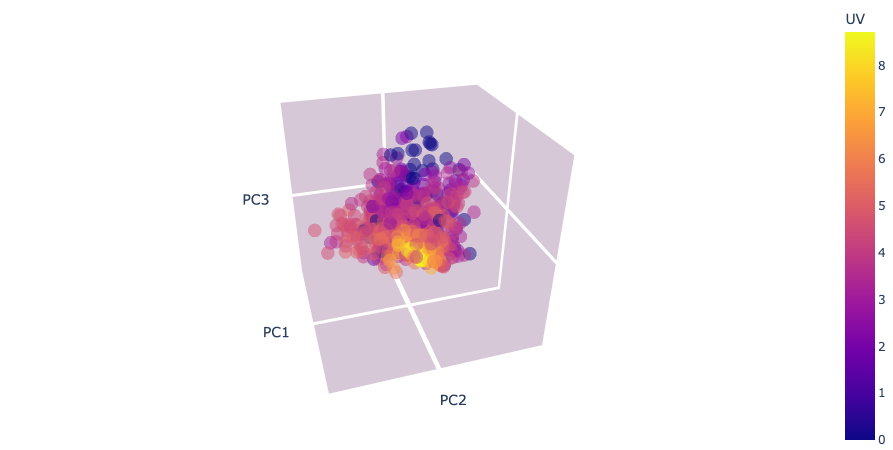

In [50]:
fig = px.scatter_3d(X_pca_log, x='PC1', y='PC2', z='PC3',
              color= objective_name, size_max = 20, opacity = 0.5)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.update_layout(
    autosize = False,
    scene = dict(
        xaxis = dict(autorange=False, 
                     nticks=3, 
                     range=[-4,4],
                     backgroundcolor="rgb(215, 200,215)",
                     gridcolor="white",
                     gridwidth = 2,
                     linecolor = "rgb(255, 255, 255)",
                     linewidth = 10,
                     showbackground=True,
                     zerolinecolor="rgb(255, 255, 255)",
                     zeroline = True,
                     zerolinewidth = 10,
                     showgrid = True,
                     visible = True,
                     showticklabels = False),
        yaxis = dict(autorange=False, 
                     nticks=3, 
                     range=[-4,4],
                     backgroundcolor="rgb(215, 200,215)",
                     gridcolor="white",
                     gridwidth = 2,
                     linecolor = "rgb(255, 255, 255)",
                     linewidth = 10,
                     showbackground=True,
                     zerolinecolor="rgb(255, 255, 255)",
                     zeroline = True,
                     zerolinewidth = 10,
                     showgrid = True,
                     visible = True,
                      showticklabels = False),
        zaxis = dict(autorange=False, 
                     nticks=3, 
                     range=[-4,4],
                     backgroundcolor="rgb(215, 200,215)",
                     gridcolor="white",
                     gridwidth = 2,
                     linecolor = "rgb(255, 255, 255)",
                     linewidth = 10,
                     showbackground=True,
                     zerolinecolor="rgb(255, 255, 255)",
                     zeroline = True,
                     zerolinewidth = 10,
                     showgrid = True,
                     visible = True,
                     showticklabels = False)
                ),
    
    scene_camera = dict(
        up=dict(x=0, y=0, z=1),
        center=dict(x=0, y=0, z=0),
        eye=dict(x=-1.2, y=1.56, z=1.92))
)





In [51]:
fig = px.scatter_3d(X_pca_log, x='PC1', y='PC2', z='PC3',
              color= objective_name, size_max = 20, opacity = 0.5)

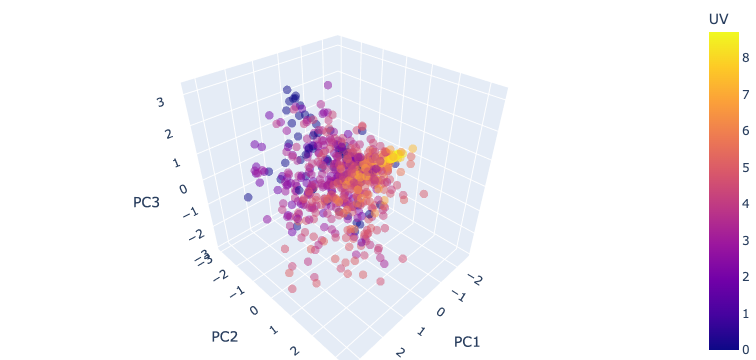

In [54]:
fig = px.scatter_3d(X_pca_log, x='PC1', y='PC2', z='PC3',
              color= objective_name, size_max = 20, opacity = 0.5)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_traces(marker_size=5)